# <center>Расчетная работа по предмету ТВиМС (Часть 2)</center>
При выполнении работы был использован язык программирования Python, а также система Jupyter Notebook.
Подключим нужные для работы библиотеки:
   * [Pandas](https://pandas.pydata.org/) - для работы с данными
   * [matplotlib](https://matplotlib.org/) - для рисования графиков
   * [Seaborn](http://seaborn.pydata.org/) - для визуализации таблиц и визуализации данных
   * math, [NumPy](https://www.numpy.org/), [SciPy](https://www.scipy.org/) - для математических функций 

In [1]:
%matplotlib inline
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib 
import numpy as np
import math
import scipy
import zipfile
import seaborn as sns
pd.options.display.float_format = '{0:.5f}'.format

Инициализируем random seed:

In [2]:
RANDOM_SEED = 1234

## <center>Непрерывные данные</center>

В качестве источника данных использовалась открытая информация о известных экзопланетах и их параметрах. Данные были взяты на сайте [NASA Exoplanet Achive](https://exoplanetarchive.ipac.caltech.edu).


Импортируем данные:

In [3]:
PATH_TO_DATA = './data/planets.csv';
data_dataframe = pd.read_csv(PATH_TO_DATA, comment='#')
data_dataframe

rowid                pl_hostname pl_letter                      pl_name  \
0         1                     11 Com         b                     11 Com b   
1         2                     11 UMi         b                     11 UMi b   
2         3                     14 And         b                     14 And b   
3         4                     14 Her         b                     14 Her b   
4         5                   16 Cyg B         b                   16 Cyg B b   
5         6                     18 Del         b                     18 Del b   
6         7      1RXS J160929.1-210524         b      1RXS J160929.1-210524 b   
7         8                     24 Boo         b                     24 Boo b   
8         9                     24 Sex         b                     24 Sex b   
9        10                     24 Sex         c                     24 Sex c   
10       11    2MASS J01225093-2439505         b    2MASS J01225093-2439505 b   
11       12    2MASS J02192210-3925225         b    2MASS J02192210-3925225 b   
12       13    2MASS J04414489+2301513         b    2MASS J04414489+2301513 b   
13       14    2MASS J12073346-3932539         b    2MASS J12073346-3932539 b   
14       15    2MASS J19383260+4603591         b    2MASS J19383260+4603591 b   
15       16  2MASS J21402931+1625183 A         b  2MASS J21402931+1625183 A b   
16       17    2MASS J22362452+4751425         b    2MASS J22362452+4751425 b   
17       18                   30 Ari B         b                   30 Ari B b   
18       19                      4 UMa         b                      4 UMa b   
19       20                     42 Dra         b                     42 Dra b   
20       21                     47 UMa         b                     47 UMa b   
21       22                     47 UMa         c                     47 UMa c   
22       23                     47 UMa         d                     47 UMa d   
23       24                     51 Eri         b                     51 Eri b   
24       25                     51 Peg         b                     51 Peg b   
25       26                     55 Cnc         b                     55 Cnc b   
26       27                     55 Cnc         c                     55 Cnc c   
27       28                     55 Cnc         d                     55 Cnc d   
28       29                     55 Cnc         e                     55 Cnc e   
29       30                     55 Cnc         f                     55 Cnc f   
...     ...                        ...       ...                          ...   
3922   3923                    eps CrB         b                    eps CrB b   
3923   3924                    eps Eri         b                    eps Eri b   
3924   3925                    eps Tau         b                    eps Tau b   
3925   3926                  gam 1 Leo         b                  gam 1 Leo b   
3926   3927                    gam Cep         b                    gam Cep b   
3927   3928                    gam Lib         b                    gam Lib b   
3928   3929                    gam Lib         c                    gam Lib c   
3929   3930                    iot Dra         b                    iot Dra b   
3930   3931                    kap And         b                    kap And b   
3931   3932                    kap CrB         b                    kap CrB b   
3932   3933                     mu Leo         b                     mu Leo b   
3933   3934                     nu Oph         b                     nu Oph b   
3934   3935                     nu Oph         c                     nu Oph c   
3935   3936                    ome Ser         b                    ome Ser b   
3936   3937                    omi CrB         b                    omi CrB b   
3937   3938                    omi UMa         b                    omi UMa b   
3938   3939                   HD 39091         c                     pi Men c   
3939   3940                psi 1 Dra 

Сделаем выборку нужного количества данных:

In [4]:
PATH_TO_DATA = data_dataframe.shape[0]
data_sample_dataframe = data_dataframe \
    .sample(n=PATH_TO_DATA, random_state=RANDOM_SEED) \
    .reset_index(drop=True)
data_sample_dataframe

rowid     pl_hostname pl_letter           pl_name    pl_discmethod  \
0      3022      Kepler-552         b      Kepler-552 b          Transit   
1      1156           K2-48         b           K2-48 b          Transit   
2      1894     Kepler-1464         b     Kepler-1464 b          Transit   
3      3881         WASP-81         b         WASP-81 b          Transit   
4      3801        WASP-170         b        WASP-170 b          Transit   
5       637        HD 27442         b        HD 27442 b  Radial Velocity   
6       999          K2-195         c          K2-195 c          Transit   
7      2806      Kepler-403         c      Kepler-403 c          Transit   
8      3182      Kepler-676         b      Kepler-676 b          Transit   
9      3124      Kepler-625         c      Kepler-625 c          Transit   
10       80        CoRoT-24         b        CoRoT-24 b          Transit   
11     1210           K2-89         b           K2-89 b          Transit   
12      806        HD 92788         b        HD 92788 b  Radial Velocity   
13     2452      Kepler-270         c      Kepler-270 c          Transit   
14      594       HD 217850         b       HD 217850 b  Radial Velocity   
15     1334     Kepler-1038         b     Kepler-1038 b          Transit   
16      836       HIP 14810         c       HIP 14810 c  Radial Velocity   
17     2239      Kepler-198         c      Kepler-198 c          Transit   
18     2013     Kepler-1550         b     Kepler-1550 b          Transit   
19      418       HD 145377         b       HD 145377 b  Radial Velocity   
20     1107          K2-278         b          K2-278 b          Transit   
21      293         HATS-69         b         HATS-69 b          Transit   
22     1442     Kepler-1113         b     Kepler-1113 b          Transit   
23     1525      Kepler-118         b      Kepler-118 b          Transit   
24     1080          K2-258         b          K2-258 b          Transit   
25     3707         Qatar-9         b         Qatar-9 b          Transit   
26     2879      Kepler-447         b      Kepler-447 b          Transit   
27       64         CoRoT-1         b         CoRoT-1 b          Transit   
28      133         GJ 3470         b         GJ 3470 b  Radial Velocity   
29      370       HD 125612         c       HD 125612 c  Radial Velocity   
...     ...             ...       ...               ...              ...   
3922   3504       Kepler-93         b       Kepler-93 b          Transit   
3923   2559      Kepler-307         b      Kepler-307 b          Transit   
3924    247         HATS-16         b         HATS-16 b          Transit   
3925   2432      Kepler-263         b      Kepler-263 b          Transit   
3926    970           K2-18         b           K2-18 b          Transit   
3927   3409       Kepler-85         c       Kepler-85 c          Transit   
3928   3398      Kepler-840         b      Kepler-840 b          Transit   
3929   3549      Kepler-967         b      Kepler-967 b          Transit   
3930   1905     Kepler-1471         b     Kepler-1471 b          Transit   
3931   2169      Kepler-173         b      Kepler-173 b          Transit   
3932   2491      Kepler-285         c      Kepler-285 c          Transit   
3933   1399     Kepler-1084         b     Kepler-1084 b          Transit   
3934   3867          WASP-7         b          WASP-7 b          Transit   
3935   3821          WASP-3         b          WASP-3 b          Transit   
3936   1183            K2-7         b            K2-7 b          Transit   
3937   3756        WASP-114         b        WASP-114 b          Transit   
3938     31           6 Lyn         b           6 Lyn b  Radial Velocity   
3939   3227      Kepler-714         b      Kepler-714 b          Transit   
3940   1258          KOI-13         b          KOI-13 b          Transit   
3941    280         HATS-53         b         HATS-53 b          Transit   
3942   2738      Kepler-374         c      Kepler-374 

Для анализа непрерывных данных выберем столбец с эксцентриситетом орбит планет:

In [5]:
values_series = data_sample_dataframe['pl_orbeccen'].dropna().reset_index(drop=True).rename(column=['value'])
values_dataframe = pd.DataFrame({'value': values_series})
values_dataframe.rename(columns={ 'value': 'Эксцентриситет' }).T

0       1       2       3       4       5       6     \
Эксцентриситет 0.06600 0.06000 0.00000 0.35000 0.76210 0.15660 0.31000   

                  7       8       9     ...    1291    1292    1293    1294  \
Эксцентриситет 0.51900 0.00000 0.12300  ... 0.20000 0.00000 0.01200 0.07300   

                  1295    1296    1297    1298    1299    1300  
Эксцентриситет 0.00064 0.33000 0.06000 0.06600 0.06600 0.34000  

[1 rows x 1301 columns]

Построим вариационный ряд:

In [6]:
values_variational_series = values_dataframe['value'].sort_values().reset_index(drop=True)
values_variational_dataframe = pd.DataFrame({'value': values_variational_series})
values_variational_dataframe.rename(columns={ 'value': 'Эксцентриситет' }).T

0       1       2       3       4       5       6     \
Эксцентриситет 0.00000 0.00000 0.00000 0.00000 0.00000 0.00000 0.00000   

                  7       8       9     ...    1291    1292    1293    1294  \
Эксцентриситет 0.00000 0.00000 0.00000  ... 0.83690 0.85000 0.85000 0.85600   

                  1295    1296    1297    1298    1299    1300  
Эксцентриситет 0.86000 0.87000 0.90300 0.92000 0.93000 0.95000  

[1 rows x 1301 columns]

#### <center>1. Интервальный ряд распределения частот и частостей</center>

Вычислим нужные параметры выборки:

In [7]:
values_min_value = values_dataframe['value'].min()
values_max_value = values_dataframe['value'].max()
values_count = values_dataframe['value'].shape[0]
pd.DataFrame({
    'Количество данных': values_count,
    'Минимальное значение': values_min_value,
    'Максимальное значение': values_max_value
}, index=['Значение']).astype(dtype='object').T

Значение
Количество данных         1301
Минимальное значение   0.00000
Максимальное значение  0.95000

Рассчитаем значения шага и количества интервалов интервального ряда распределения используя формулу Стерджесса:
    
$$
M = 1 + 3.22 * log_{10}(N)
$$

$$
h = \frac{\hat{x}_n - \hat{x}_1}{M} = \frac{\hat{x}_n - \hat{x}_1}{1 + 3.22 * log_{10}(N)}
$$


In [8]:
def calculate_interval_count(n):
    return 3.322 * np.log10(n)
    
interval_count_by_formula = calculate_interval_count(values_count)
interval_value_by_formula = (values_max_value - values_min_value) / interval_count_by_formula
interval_count = np.floor(interval_count_by_formula).astype(dtype='int')
interval_value = (values_max_value - values_min_value) / interval_count

pd.DataFrame({
    'Число интервалов по формуле': interval_count_by_formula,
    'Шаг по формуле': interval_value_by_formula,
    'Число интервалов (M)': interval_count,
    'Шаг (h)': interval_value
}, index = ['Значение']).astype(dtype='object').T

Значение
Число интервалов по формуле 10.34563
Шаг по формуле               0.09183
Число интервалов (M)              10
Шаг (h)                      0.09500

Построим интервальный ряд распределения:

In [9]:
intervals = [values_min_value + i * interval_value for i in range(interval_count + 1)]
intervals[0] -= 1e-6
intervals_cut_series, intervals_cut_bins = pd.cut(values_variational_dataframe['value'], bins=intervals, retbins=True)
intervals_cut_series = intervals_cut_series.rename('interval')
intervals_indexes = intervals_cut_series.cat.categories
intervals_dataframe = pd.DataFrame({
    'interval': intervals_indexes
})

intervals_dataframe = pd.DataFrame({
    'interval': intervals_dataframe['interval'],
    'count': values_variational_dataframe.join(intervals_cut_series).groupby('interval').aggregate(len)['value'].reset_index(drop=True).fillna(0),
    'frequency': values_variational_dataframe.join(intervals_cut_series).groupby('interval').aggregate(len)['value'].reset_index(drop=True).div(values_count).fillna(0)
})

pd.DataFrame({
    'Интервал': intervals_dataframe['interval'],
    '$x_i$': intervals_dataframe['interval'].apply(lambda interval: interval.left),
    '$x_{i+1}$': intervals_dataframe['interval'].apply(lambda interval: interval.right),
    '$x_{ср}$': intervals_dataframe['interval'].apply(lambda interval: interval.mid),
    'Частота' : intervals_dataframe['count'].astype(dtype='int'),
    'Частость' : intervals_dataframe['frequency']
}) \
    .reindex(index=intervals_dataframe.index.rename('Индекс интервала'))

Интервал    $x_i$  $x_{i+1}$  $x_{ср}$  Частота  \
Индекс интервала                                                           
0                 (-1e-06, 0.095] -0.00000    0.09500   0.04750      632   
1                   (0.095, 0.19]  0.09500    0.19000   0.14250      263   
2                   (0.19, 0.285]  0.19000    0.28500   0.23750      142   
3                   (0.285, 0.38]  0.28500    0.38000   0.33250       97   
4                   (0.38, 0.475]  0.38000    0.47500   0.42750       52   
5                   (0.475, 0.57]  0.47500    0.57000   0.52250       45   
6                   (0.57, 0.665]  0.57000    0.66500   0.61750       24   
7                   (0.665, 0.76]  0.66500    0.76000   0.71250       26   
8                   (0.76, 0.855]  0.76000    0.85500   0.80750       13   
9                   (0.855, 0.95]  0.85500    0.95000   0.90250        7   

                  Частость  
Индекс интервала            
0                  0.48578  
1                  0.20215  
2                  0.10915  
3                  0.07456  
4                  0.03997  
5                  0.03459  
6                  0.01845  
7                  0.01998  
8                  0.00999  
9                  0.00538

#### <center>2. Гистограмма частот</center>

Построим гистограмму частот:

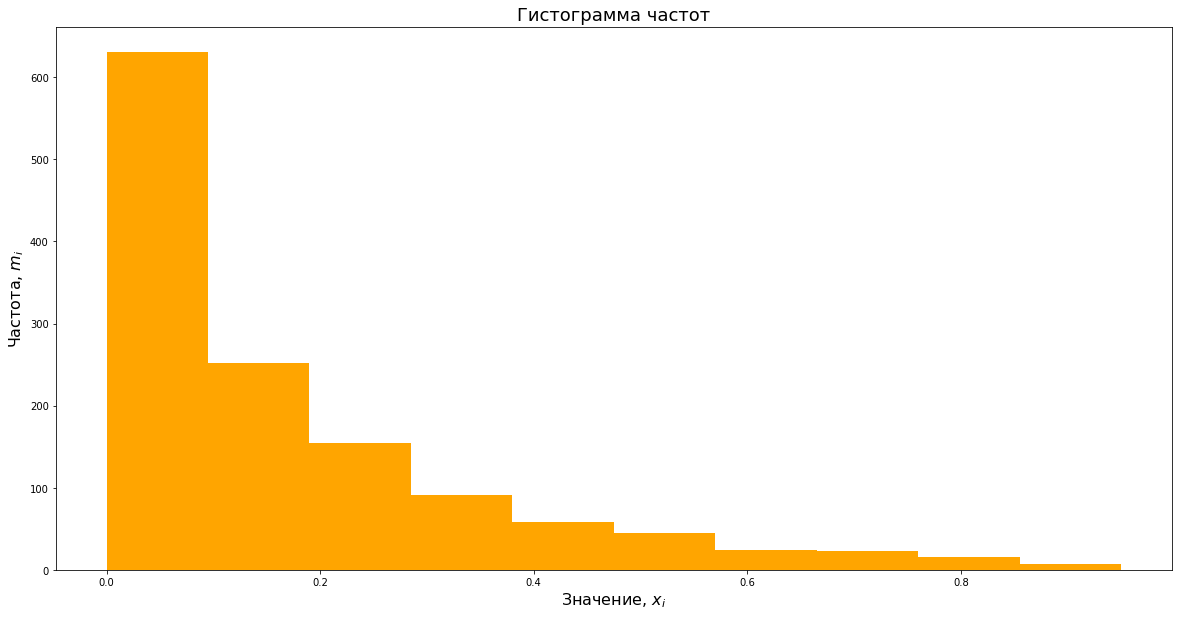

In [10]:
fig, ax = plt.subplots(figsize=(20, 10))
sns.distplot(values_variational_series, bins=intervals_cut_bins, hist_kws={
    "linewidth": 3, "alpha": 1, "color": "orange"
}, kde=False)
plt.title('Гистограмма частот', fontsize=18)
plt.xlabel('Значение, $x_i$', fontsize=16)
plt.ylabel('Частота, $m_i$', fontsize=16)
plt.show()

 #### <center>3. Эмпирическая функция распределения</center>

Найдем эмпирическую функцию распределения:

In [11]:
empirical_function_intervals_indexes = pd.IntervalIndex.from_breaks([float("-inf"), *intervals_cut_bins, float("+inf")], closed='left')

empirical_function_dataframe = pd.DataFrame({
    'value': [0, *intervals_dataframe['frequency'], 0]
}, index=empirical_function_intervals_indexes.set_closed('right').rename('interval')).cumsum()

pd.DataFrame({
    'Значение': empirical_function_dataframe['value']
}, index=empirical_function_dataframe.index.rename('Интервал'))

Значение
Интервал                             
(-inf, -1e-06]                0.00000
(-1e-06, 0.095]               0.48578
(0.095, 0.19]                 0.68793
(0.19, 0.28500000000000003]   0.79708
(0.28500000000000003, 0.38]   0.87164
(0.38, 0.475]                 0.91161
(0.475, 0.5700000000000001]   0.94620
(0.5700000000000001, 0.665]   0.96464
(0.665, 0.76]                 0.98463
(0.76, 0.855]                 0.99462
(0.855, 0.95]                 1.00000
(0.95, inf]                   1.00000

Построим эмпирическую функцию распределения:

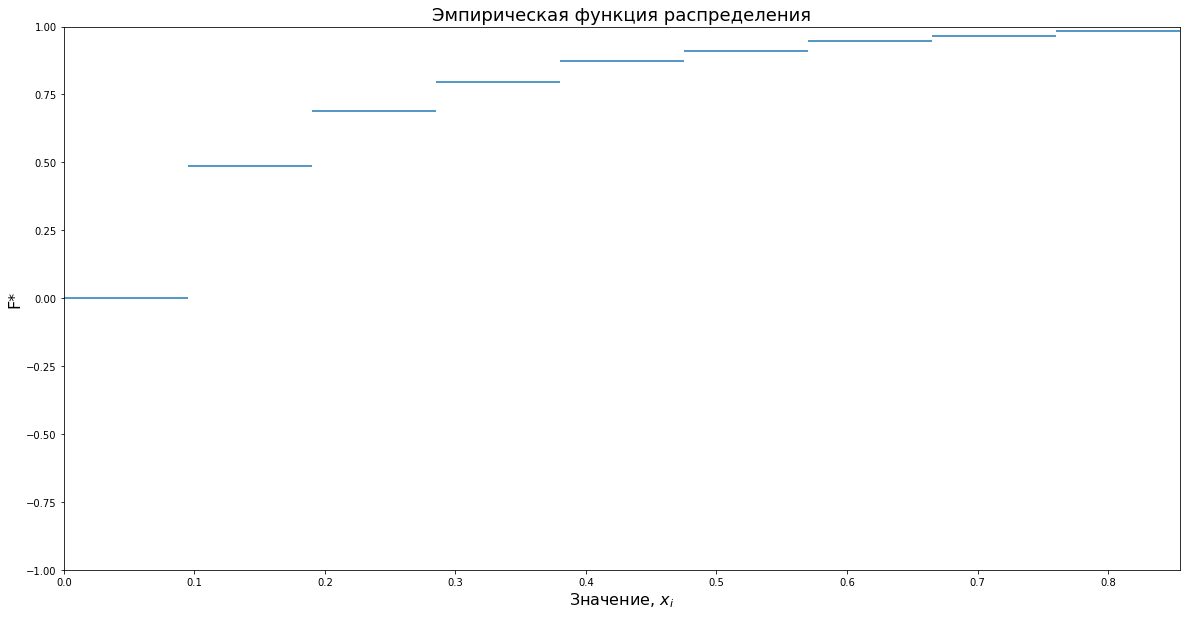

In [12]:
fig, ax = plt.subplots(figsize=(20, 10))

xs = zip([*empirical_function_dataframe.index.left][1:-1], [*empirical_function_dataframe.index.left][2:])
ys = zip([*empirical_function_dataframe['value']][:-1], [*empirical_function_dataframe['value']][:-1])
lines = matplotlib.collections.LineCollection([list(zip(x, y)) for x, y in zip(xs, ys)])

ax.add_collection(lines)
ax.set_xlim(empirical_function_dataframe.index.left[1:].min(), empirical_function_dataframe.index.left[1:-1].max())
ax.set_ylim(-1, 1)

plt.title('Эмпирическая функция распределения', fontsize=18)
plt.xlabel('Значение, $x_i$', fontsize=16)
plt.ylabel('F*', fontsize=16)
plt.show()

 #### <center>4. Характеристики распределения</center>

Вычислим характеристики распределения:

In [13]:
intervals_count = intervals_dataframe['count']
t_count_max_idx = intervals_count.idxmax()
t_max = intervals_count.get(t_count_max_idx, 0)
t_max_interval = intervals_dataframe['interval'][t_count_max_idx]
t_max_minus_1 = intervals_count.get(t_count_max_idx - 1, 0)
t_max_plus_1 = intervals_count.get(t_count_max_idx + 1, 0)

t_count_mean_idx = intervals_count[intervals_count.cumsum() >= values_count / 2.0].reset_index()['index'][0]
t_mean = intervals_count.get(t_count_mean_idx, 0)
t_mean_interval = intervals_dataframe['interval'][t_count_mean_idx]
t_mean_less = intervals_count[intervals_count.reset_index()['index'] < t_count_mean_idx]

characteristics_dataframe = pd.DataFrame({
}, index=['value'], dtype='object')

characteristics_dataframe['min'] = \
    [values_min_value]
characteristics_dataframe['max'] = \
    [values_max_value]
characteristics_dataframe['mode'] = \
    [t_max_interval.left + interval_value * (t_max - t_max_minus_1) / ((t_max - t_max_minus_1) + (t_max_plus_1 - t_max))]
characteristics_dataframe['median'] = \
    [t_mean_interval.left + interval_value * (intervals_count.sum() / 2.0 - t_mean_less.sum()) / t_mean]
characteristics_dataframe['expectation'] = \
    [(intervals_dataframe['interval'].apply(lambda interval: interval.mid) * intervals_dataframe['frequency']).sum()]
characteristics_dataframe['second_moment'] = \
    [values_variational_series.pow(2).sum() / values_count]
characteristics_dataframe['dispersion'] = \
    [values_variational_series.sub(characteristics_dataframe['expectation'][0]).pow(2).sum() / values_count]
characteristics_dataframe['sigma'] = \
    np.sqrt(characteristics_dataframe['dispersion'])
characteristics_dataframe['variational_coeff'] = \
    characteristics_dataframe['sigma'].div(characteristics_dataframe['expectation'])
characteristics_dataframe['variation_range'] = \
    characteristics_dataframe['max'] - characteristics_dataframe['min']

linear_differential = \
    (intervals_dataframe['interval'].apply(lambda interval: interval.mid) - \
     characteristics_dataframe['expectation'][0] \
    ).abs().mul(intervals_dataframe['frequency'])

central_moment_3 = \
    (intervals_dataframe['interval'].apply(lambda interval: interval.mid) - \
     characteristics_dataframe['expectation'][0] \
    ).pow(3).mul(intervals_dataframe['frequency'])

central_moment_4 = \
    (intervals_dataframe['interval'].apply(lambda interval: interval.mid) - \
     characteristics_dataframe['expectation'][0] \
    ).pow(4).mul(intervals_dataframe['frequency'])

characteristics_dataframe['assymetry'] = \
    central_moment_3.aggregate(np.sum) / \
        (characteristics_dataframe['sigma'] ** 3)

characteristics_dataframe['excess'] = \
    central_moment_4.aggregate(np.sum) / \
        (characteristics_dataframe['sigma'] ** 4) - 3
characteristics_dataframe['dispersion']

value   0.03673
Name: dispersion, dtype: float64

In [14]:
pd.DataFrame({
    'Среднее линейное отконение': linear_differential,
    'Центральные моменты 3-го порядка': central_moment_3,
    'Центральные моменты 4-го порядка': central_moment_4,
})

Среднее линейное отконение  Центральные моменты 3-го порядка  \
0                     0.06257                          -0.00104   
1                     0.00683                          -0.00001   
2                     0.00668                           0.00003   
3                     0.01165                           0.00028   
4                     0.01004                           0.00063   
5                     0.01197                           0.00144   
6                     0.00814                           0.00158   
7                     0.01072                           0.00308   
8                     0.00631                           0.00251   
9                     0.00391                           0.00206   

   Центральные моменты 4-го порядка  
0                           0.00013  
1                           0.00000  
2                           0.00000  
3                           0.00004  
4                           0.00016  
5                           0.00050  
6                           0.00070  
7                           0.00165  
8                           0.00159  
9                           0.00150

In [15]:
pd.DataFrame({
    'Минимальное значение': characteristics_dataframe['min'][0],
    'Максимальное значение': characteristics_dataframe['max'][0],
    'Мода': characteristics_dataframe['mode'][0],
    'Медиана': characteristics_dataframe['median'][0],
    'Математическое ожидание': characteristics_dataframe['expectation'][0],
    'Второй момент': characteristics_dataframe['second_moment'][0],
    'Дисперсия': characteristics_dataframe['dispersion'][0],
    'σ': characteristics_dataframe['sigma'][0],
    'Коэффицент вариации': characteristics_dataframe['variational_coeff'][0],
    'Размах вариации': characteristics_dataframe['variation_range'][0],
    'Ассиметрия': characteristics_dataframe['assymetry'][0],
    'Эксцесс': characteristics_dataframe['excess'][0]
}, index=['Значение']).T

Значение
Минимальное значение      0.00000
Максимальное значение     0.95000
Мода                      0.22829
Медиана                   0.10168
Математическое ожидание   0.17631
Второй момент             0.06378
Дисперсия                 0.03673
σ                         0.19165
Коэффицент вариации       1.08704
Размах вариации           0.95000
Ассиметрия                1.50147
Эксцесс                   1.64650

 #### <center>5. Проверка качества группировки</center>

Рассмотрим характеристики каждого интервала:

In [16]:
interval_indexer = intervals_indexes.get_indexer

x_interval_mid = intervals_dataframe['interval'].apply(lambda interval: interval.mid).astype('float')

x_interval_count = intervals_dataframe['count']

x_joint_interval_mean = characteristics_dataframe['expectation'][0]

x_interval_group_mean = \
    values_variational_dataframe \
    .join(intervals_cut_series) \
    .groupby('interval') \
    .aggregate({ 'value': lambda series: series.sum() / series.count() }).fillna(0) \
    .reset_index(drop=True)['value'].rename('group_mean')

x_crossgroup_dispersion = \
    (x_interval_group_mean - x_joint_interval_mean).pow(2).mul(x_interval_count).sum() / x_interval_count.sum()

x_interval_group_dispersion_helper = values_variational_dataframe \
    .join(intervals_cut_series).set_index('interval') \
    .join(intervals_dataframe.join(x_interval_group_mean).set_index('interval')).reset_index()

x_interval_group_dispersion_helper = pd.DataFrame({
    **x_interval_group_dispersion_helper,
    'sigma': (x_interval_group_dispersion_helper['value'] - x_interval_group_dispersion_helper['group_mean']).pow(2)
}).groupby('interval').aggregate({ 'sigma': lambda series: series.sum() })

x_interval_group_dispersion = \
    x_interval_group_dispersion_helper.reset_index(drop=True)['sigma'] / x_interval_count

x_interval_h = intervals_dataframe['interval'].apply(lambda x: x.right - x.left)

x_interval_frequency = \
    x_interval_count / values_count
x_interval_statistical_pmf = \
    x_interval_frequency / x_interval_h
x_interval_statistical_cdf = \
    x_interval_frequency.cumsum();

pd.DataFrame({
    'Интервал': intervals_dataframe['interval'],
    '$x_{i ср}$': x_interval_mid,
    '$v_{i}$': x_interval_count,
    '$p_{i}^{*}$': x_interval_frequency,
    '$f_{i}^{*}$': x_interval_statistical_pmf,
    '$F_{i}^{*}$': x_interval_statistical_cdf,
    '$\overline{x}_{i}$': x_interval_group_mean,
    '$\sigma^{2}_{i}$': x_interval_group_dispersion,
})

Интервал  $x_{i ср}$   $v_{i}$  $p_{i}^{*}$  $f_{i}^{*}$  \
0  (-1e-06, 0.095]     0.04750 632.00000      0.48578      5.11342   
1    (0.095, 0.19]     0.14250 263.00000      0.20215      2.12792   
2    (0.19, 0.285]     0.23750 142.00000      0.10915      1.14891   
3    (0.285, 0.38]     0.33250  97.00000      0.07456      0.78482   
4    (0.38, 0.475]     0.42750  52.00000      0.03997      0.42073   
5    (0.475, 0.57]     0.52250  45.00000      0.03459      0.36409   
6    (0.57, 0.665]     0.61750  24.00000      0.01845      0.19418   
7    (0.665, 0.76]     0.71250  26.00000      0.01998      0.21036   
8    (0.76, 0.855]     0.80750  13.00000      0.00999      0.10518   
9    (0.855, 0.95]     0.90250   7.00000      0.00538      0.05664   

   $F_{i}^{*}$  $\overline{x}_{i}$  $\sigma^{2}_{i}$  
0      0.48578             0.02743           0.00094  
1      0.68793             0.13827           0.00077  
2      0.79708             0.23446           0.00068  
3      0.87164             0.32813           0.00083  
4      0.91161             0.42505           0.00085  
5      0.94620             0.51985           0.00074  
6      0.96464             0.61390           0.00072  
7      0.98463             0.71508           0.00070  
8      0.99462             0.81210           0.00092  
9      1.00000             0.89843           0.00118

Найдем значения общей дисперсии через сумму средней внутригрупповой дисперсии и межгрупповой дисперсии используя формулу:

$$ \sigma^2_{общ} = \overline{\sigma^{2}_{i}} + \sigma^{2}_{мг} $$

In [17]:
x_group_dispersion_mean = x_interval_group_dispersion.mul(x_interval_count).sum() / x_interval_count.sum()
x_dispersion_joint = x_group_dispersion_mean + x_crossgroup_dispersion

pd.DataFrame({
    '$\overline{\sigma^{2}_{i}}$': x_group_dispersion_mean,
    '$\sigma^{2}_{мг}$': x_crossgroup_dispersion,
    '$\sigma^2_{общ}$': x_dispersion_joint,
    '$\sigma^2$': characteristics_dataframe['dispersion'][0],
    '$|\sigma^2 - \sigma^{2}_{общ}|$': abs(characteristics_dataframe['dispersion'][0] - x_dispersion_joint),
    '$\tfrac{\overline{\sigma^{2}_{i}}}{\sigma^{2}_{общ}}$': x_group_dispersion_mean / x_dispersion_joint
}, index=['Значение']).T

Значение
$\overline{\sigma^{2}_{i}}$                          0.00085
$\sigma^{2}_{мг}$                                    0.03588
$\sigma^2_{общ}$                                     0.03673
$\sigma^2$                                           0.03673
$|\sigma^2 - \sigma^{2}_{общ}|$                      0.00000
$\tfrac{\overline{\sigma^{2}_{i}}}{\sigma^{2}_{...   0.02315

Вычислив отклонение $\sigma^2_{общ}$ от $\sigma^2$ можно заключить, что правило сложения правило сложения дисперсий выполняется.

 #### <center>6. Гипотеза о виде распределения</center>

Проанализировав полигон частот и эмпирический график функции распределения выдвинем гипотезу о том, что распределение является бета-распределением:

$$
f(x | \alpha, \beta) = \frac{\Gamma(\alpha + \beta)}{\Gamma(\alpha)\Gamma(\beta)}x^{\alpha - 1}(1 - x)^{\beta - 1} = \frac{1}{B(\alpha, \beta)} x^{\alpha - 1}(1 - x)^{\beta - 1}
$$
Где $\Gamma(x)$: 
$$\Gamma(x) = \int_{0}^{\infty}{t^{x - 1}e^{-t}dt}$$
Где $B(\alpha, \beta)$: 
$$B(x) = \frac{\Gamma(\alpha)\Gamma(\beta)}{\Gamma(\alpha + \beta)}$$

Найдем параметры распределения:
$$
\hat{x} = \frac{1}{N} \sum_{i=1}^{N}{x_i}
$$
$$
\hat{v} = \frac{1}{N - 1} \sum_{i=1}^{N}{(x_i - \hat{x})^2}
$$

$$
\hat{\alpha} = \hat{x}\left(\frac{\hat{x}(1 - \hat{x})}{\hat{v}} - 1\right)
$$

$$
\hat{\beta} = (1 - \hat{x})\left(\frac{\hat{x}(1 - \hat{x})}{\hat{v}} - 1\right)
$$

In [18]:
x_average_estimated = characteristics_dataframe['expectation'][0]
x_variance_estimated = characteristics_dataframe['dispersion'][0] * values_count / (values_count - 1)
x_alpha = x_average_estimated * (x_average_estimated * (1 - x_average_estimated) / x_variance_estimated - 1)
x_beta = (1 - x_average_estimated) * (x_average_estimated * (1 - x_average_estimated) / x_variance_estimated - 1)

pd.DataFrame({
    '$\hat{x}$': x_average_estimated,
    '$\hat{v}$': x_variance_estimated,
    '$\hat{α}$': x_alpha,
    '$\hat{β}$': x_beta
}, index=['Значение']).T

Значение
$\hat{x}$   0.17631
$\hat{v}$   0.03676
$\hat{α}$   0.52022
$\hat{β}$   2.43041

 #### <center>6. Сравнение с теоретическим распределением</center>

Сравним теоретические и эмпирические характеристики:

In [19]:
x_theoretical_expectation = x_alpha / (x_alpha + x_beta)
x_theoretical_dispersion = x_alpha * x_beta / (x_alpha + x_beta) ** 2 / (x_alpha + x_beta + 1)
x_theoretical_assymetry = \
    2 * (x_beta - x_alpha) * math.sqrt(x_alpha + x_beta + 1) / (x_alpha + x_beta + 2) / math.sqrt(x_alpha * x_beta)
x_theoretical_second_moment = x_theoretical_dispersion + x_theoretical_expectation ** 2
x_theoretical_sigma = math.sqrt(x_theoretical_dispersion)
x_theoretical_variational_coeff = x_theoretical_sigma / x_theoretical_expectation
x_theoretical_variational_excess = \
    6 * ((x_beta - x_alpha) ** 2 * (x_alpha + x_beta + 1) - x_alpha * x_beta * (x_alpha + x_beta + 2)) / \
        (x_alpha * x_beta * (x_alpha + x_beta + 2) * (x_alpha + x_beta + 3))

rv = scipy.stats.beta(x_alpha, x_beta)
x_theoretical_mode = 0
x_theoretical_median = rv.median()

pd.DataFrame({
    'Мода': [characteristics_dataframe['mode'][0], x_theoretical_mode],
    'Медиана': [characteristics_dataframe['median'][0], x_theoretical_median],
    'Математическое ожидание': [characteristics_dataframe['expectation'][0], x_theoretical_expectation],
    'Второй момент': [characteristics_dataframe['second_moment'][0], x_theoretical_second_moment],
    'Дисперсия': [characteristics_dataframe['dispersion'][0], x_theoretical_dispersion],
    'σ': [characteristics_dataframe['sigma'][0], x_theoretical_sigma],
    'Коэффицент вариации': [characteristics_dataframe['variational_coeff'][0], x_theoretical_variational_coeff],
    'Ассиметрия': [characteristics_dataframe['assymetry'][0], x_theoretical_assymetry],
    'Эксцесс': [characteristics_dataframe['excess'][0], x_theoretical_variational_excess]
}, index=['Эмпирическое', 'Теоретическое']).T

Эмпирическое  Теоретическое
Мода                          0.22829        0.00000
Медиана                       0.10168        0.10508
Математическое ожидание       0.17631        0.17631
Второй момент                 0.06378        0.06784
Дисперсия                     0.03673        0.03676
σ                             0.19165        0.19173
Коэффицент вариации           1.08704        1.08746
Ассиметрия                    1.50147        1.36410
Эксцесс                       1.64650        1.31380

Найдем теоретические значения частот и частостей в интервалах и сравним с эмпирическими:

In [20]:
x_theoretical_interval_frequency = intervals_dataframe['interval'] \
    .apply(lambda interval: rv.cdf(interval.right) - rv.cdf(interval.left)) \
    .astype('float')
x_theoretical_interval_count = x_theoretical_interval_frequency.mul(values_count)
x_theoretical_cdf = x_theoretical_interval_frequency.rename('$F_0$').cumsum()

pd.DataFrame({
    'Интервал': intervals_dataframe['interval'],
    '$v_{i}$': x_interval_count,
    '$p_{i}^{*}$':  x_interval_frequency,
    '$f_{i}^{*}$':  x_interval_statistical_pmf,
    '$F_{i}^{*}$': x_interval_statistical_cdf,
    '${v_{i}}\'$': x_theoretical_interval_count,
    '${p_{i}}\'$': x_theoretical_interval_frequency,
    '${F_{0,i}}$': x_theoretical_cdf,
})

Интервал   $v_{i}$  $p_{i}^{*}$  $f_{i}^{*}$  $F_{i}^{*}$  \
0  (-1e-06, 0.095] 632.00000      0.48578      5.11342      0.48578   
1    (0.095, 0.19] 263.00000      0.20215      2.12792      0.68793   
2    (0.19, 0.285] 142.00000      0.10915      1.14891      0.79708   
3    (0.285, 0.38]  97.00000      0.07456      0.78482      0.87164   
4    (0.38, 0.475]  52.00000      0.03997      0.42073      0.91161   
5    (0.475, 0.57]  45.00000      0.03459      0.36409      0.94620   
6    (0.57, 0.665]  24.00000      0.01845      0.19418      0.96464   
7    (0.665, 0.76]  26.00000      0.01998      0.21036      0.98463   
8    (0.76, 0.855]  13.00000      0.00999      0.10518      0.99462   
9    (0.855, 0.95]   7.00000      0.00538      0.05664      1.00000   

   ${v_{i}}'$  ${p_{i}}'$  ${F_{0,i}}$  
0   620.37321     0.47684      0.47684  
1   227.64205     0.17497      0.65182  
2   149.07214     0.11458      0.76640  
3   104.57158     0.08038      0.84678  
4    74.34295     0.05714      0.90392  
5    52.07288     0.04003      0.94395  
6    35.00813     0.02691      0.97086  
7    21.75633     0.01672      0.98758  
8    11.59052     0.00891      0.99649  
9     4.23840     0.00326      0.99974

Сравним гистограммы:

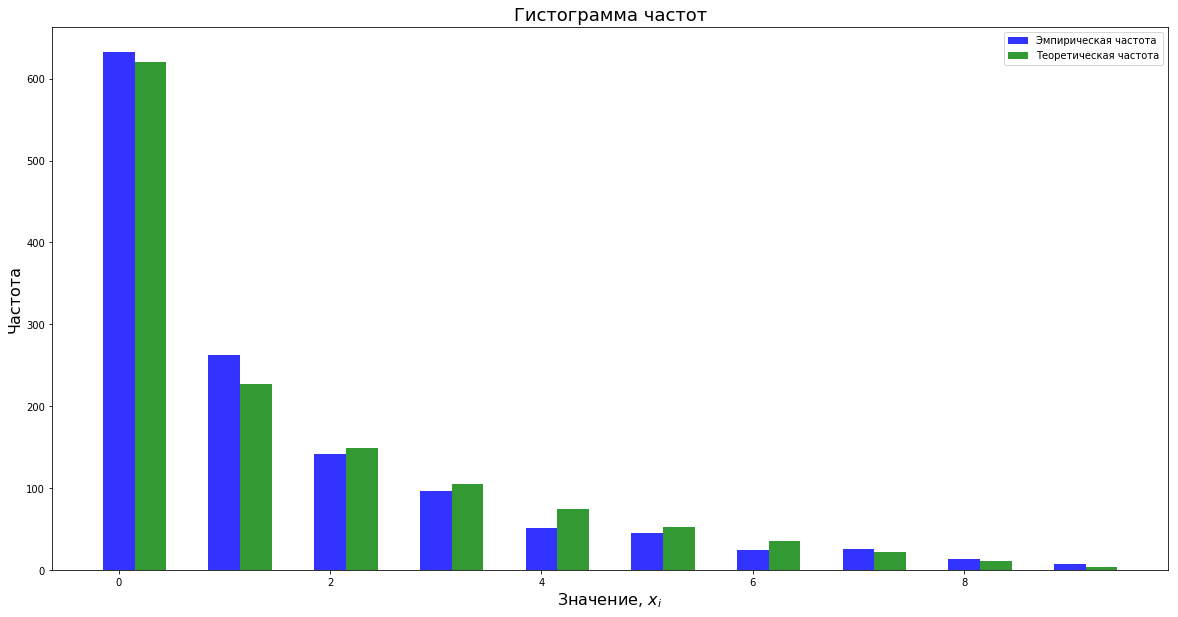

In [21]:
fig, ax = plt.subplots(figsize=(20, 10))

n_groups = interval_count
graph_index = np.arange(n_groups)
bar_width = 0.3
opacity = 0.8

rv = scipy.stats.beta(x_alpha, x_beta)
y = [*map(lambda x: (rv.cdf(x.right) - rv.cdf(x.left)) * values_count, intervals_indexes)]

rects1 = plt.bar(graph_index, intervals_count, bar_width,
    alpha=opacity,
    color='b',
    label='Эмпирическая частота')

rects1 = plt.bar(graph_index + bar_width, y, bar_width,
    alpha=opacity,
    color='g',
    label='Теоретическая частота')

plt.title('Гистограмма частот', fontsize=18)
plt.xlabel('Значение, $x_i$', fontsize=16)
plt.ylabel('Частота', fontsize=16)
plt.legend()
plt.show()

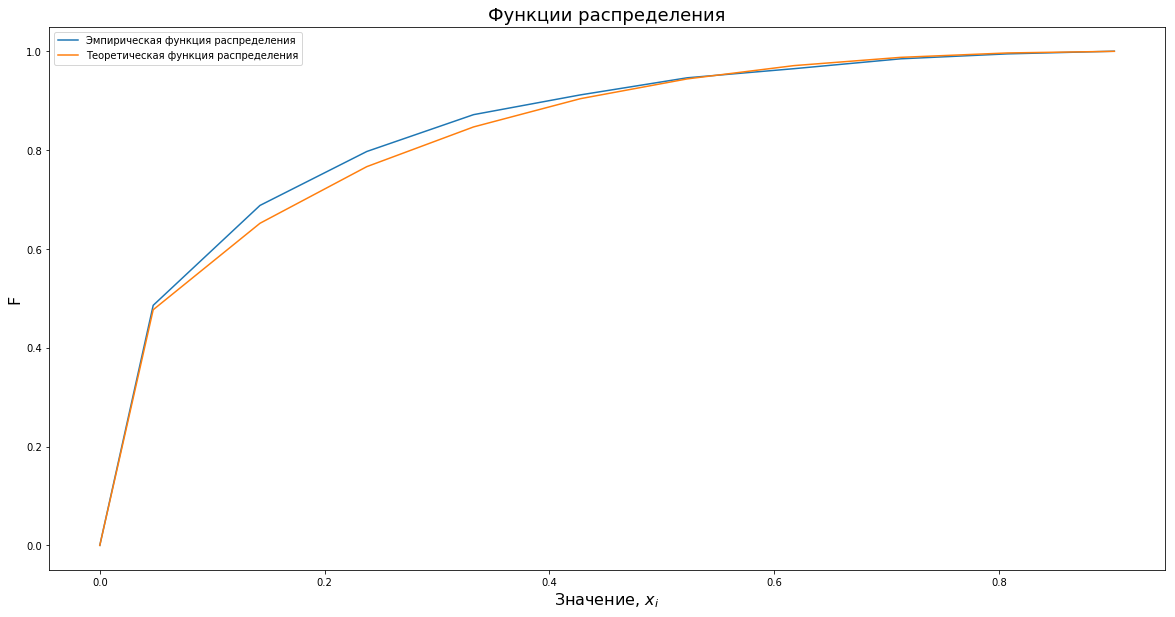

In [22]:
fig, ax = plt.subplots(figsize=(20, 10))
frequency_plot_indexes = [0, *intervals_indexes.mid]
sns.lineplot(x=frequency_plot_indexes, y=[0, *x_interval_statistical_cdf], label='Эмпирическая функция распределения')
sns.lineplot(x=frequency_plot_indexes, y=[0, *x_theoretical_cdf], label='Теоретическая функция распределения')
plt.title('Функции распределения', fontsize=18)
plt.xlabel('Значение, $x_i$', fontsize=16)
plt.ylabel('F', fontsize=16)
plt.show()

 #### <center>7. Проверка критериев</center>

Принем уровень значимости:
$$
\alpha = 0.05
$$

In [23]:
level_significance = 0.05

 ##### 7.1 Проверка критерия согласия Пирсона

Посчитаем данные для критерия:

In [24]:
x_criteria_value = x_interval_count.sub(x_theoretical_interval_count).pow(2) \
    .div(x_theoretical_interval_count)
pd.DataFrame({
    'Интервал': intervals_dataframe['interval'],
    'Критерий': x_criteria_value
})

Интервал  Критерий
0  (-1e-06, 0.095]   0.21790
1    (0.095, 0.19]   5.49189
2    (0.19, 0.285]   0.33551
3    (0.285, 0.38]   0.54823
4    (0.38, 0.475]   6.71493
5    (0.475, 0.57]   0.96068
6    (0.57, 0.665]   3.46145
7    (0.665, 0.76]   0.82775
8    (0.76, 0.855]   0.17140
9    (0.855, 0.95]   1.79936

Посчитаем значение параметра количество степеней свободы:
$$
df = k - p - 1
$$
Где p = 2, для двух параметров

In [25]:
degrees_freedom = intervals_dataframe.shape[0] - 2 - 1
print(degrees_freedom)

7


Посчитаем значение критерия $\chi^2$ и сравним с табличным:
$$
\chi^2 = \sum^{M}_{i=1}\frac{(v_i - n p_i)^2}{np_i}
$$

In [26]:
chi = x_criteria_value.sum()
chi_table = scipy.stats.chi2(degrees_freedom).ppf(1 - level_significance)

pd.DataFrame({
    '$\chi^2$': chi,
    '$\chi^2_{табл}$': chi_table 
}, index=['Значение']).T

Значение
$\chi^2$         20.52910
$\chi^2_{табл}$  14.06714

Исходя из того, что $\chi^2 > \chi^2_{табл}$, утверждаем что, гипотеза опровергается.

##### 7.2 Проверка критерия согласия Романовского

Вычислим значение критерия согласия Романовского:
$$
R = \frac{|\chi^2 - df|}{\sqrt{2df}}
$$
Где $df$ - число степеней свободы

In [27]:
x_r = abs(chi - degrees_freedom) / math.sqrt(2 * degrees_freedom)
pd.DataFrame({
    '$R$': x_r
}, index=['Значение']).T

Значение
$R$   3.61580

Так как $R > 3$, то гипотеза опровергается.

##### 7.3 Проверка критерия согласия Колмогорова

Вычислим значение критерия согласия Колмогорова:
$$
\lambda = \sqrt{n} * Z
$$
Где $Z = \max\limits_{1 \le i \le n}{|F^{*}(x+i) - F_{0}(x_i)|}$

In [28]:
empirical_function_dataframe[1:-1].reset_index() \
    .join(x_interval_statistical_cdf.rename('$F_0$')) \
    .join
pd.DataFrame({
    'Интервал': intervals_dataframe['interval'],
    '$F_{i}^{*}$': x_interval_statistical_cdf,
    '${F_{0,i}}$': x_theoretical_cdf,
})

Интервал  $F_{i}^{*}$  ${F_{0,i}}$
0  (-1e-06, 0.095]      0.48578      0.47684
1    (0.095, 0.19]      0.68793      0.65182
2    (0.19, 0.285]      0.79708      0.76640
3    (0.285, 0.38]      0.87164      0.84678
4    (0.38, 0.475]      0.91161      0.90392
5    (0.475, 0.57]      0.94620      0.94395
6    (0.57, 0.665]      0.96464      0.97086
7    (0.665, 0.76]      0.98463      0.98758
8    (0.76, 0.855]      0.99462      0.99649
9    (0.855, 0.95]      1.00000      0.99974

In [29]:
Z = x_theoretical_cdf.sub(x_interval_statistical_cdf).abs().max()
lambd = math.sqrt(interval_count) * Z
lambd_table = scipy.stats.ksone(degrees_freedom).ppf(1 - level_significance)
pd.DataFrame({
    '$Z$': Z,
    '$\lambda$': lambd,
    '$\lambda_{табл}$': lambd_table,
}, index=['Значение']).T

Значение
$Z$                0.03611
$\lambda$          0.11420
$\lambda_{табл}$   0.43607

Так как $\lambda < \lambda_{табл}$, то гипотеза принимается.

##### 7.4 Проверка критерия согласия Ястремского

Вычислим значение критерия согласия Ястремского:
$$
J = \frac{\chi^2 - df}{\sqrt{2n + 2.4}}
$$
Где $n$ - количество групп в вариационном ряду

In [30]:
J = abs(chi - degrees_freedom) / math.sqrt(2 * interval_count + 2.4)
pd.DataFrame({
    '$J$': J
}, index=['Значение']).T

Значение
$J$   2.85854

Так как $J < 3$, то гипотеза принимается.